In [24]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [25]:
ROOT_DIR = os.getcwd()
SRC_DIR  = os.path.join(ROOT_DIR, 'src')
LOG_DIR  = os.path.join(SRC_DIR, 'log')

In [28]:
def file_parser(text_path, n_sample=18):
    cameraTTC_array = np.empty((n_sample))
    lidarTTC_array  = np.empty((n_sample))
    with open(text_path, 'r') as f:
        lines = f.readlines()
        for img_ind in range(n_sample):
            cameraTTC_line = lines[5*img_ind+2]
            lidarTTC_line = lines[5*img_ind+3]
            cameraTTC = line_parser(cameraTTC_line, True)
            lidarTTC  = line_parser(lidarTTC_line, False)            
            cameraTTC_array[img_ind] = cameraTTC
            lidarTTC_array[img_ind]  = lidarTTC
    return cameraTTC_array, lidarTTC_array

def line_parser(line, cam):
    if cam:
        return float(line.strip().split(':')[1].split(' ')[1])
    else:
        return float(line.strip().split(':')[1].split(' ')[2])
    

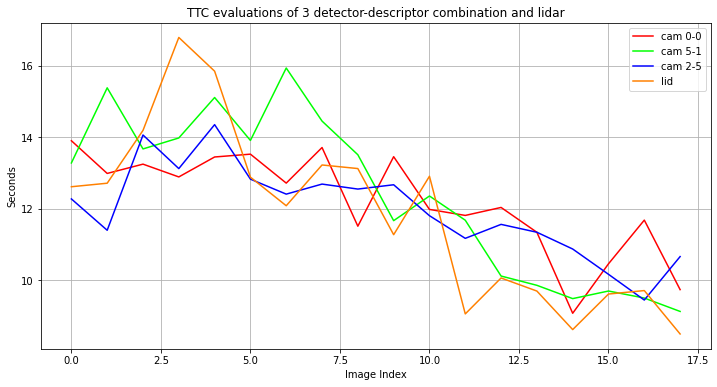

In [94]:
log_list = [os.path.join(LOG_DIR, log_name) for log_name in os.listdir(LOG_DIR) if log_name.endswith('.txt')]
colors = [(1,0,0), (0,1,0), (0,0,1)]

fig, ax = plt.subplots(figsize=(12,6))
all_cameraTTCs, all_lidarTTCs = [], []
cam_names = []
for ind, log_path in enumerate(log_list):
    cameraTTCs, lidarTTCs = file_parser(log_path)
    all_cameraTTCs.append(cameraTTCs)
    all_lidarTTCs.append(lidarTTCs)
    cam_name = log_path.split('/')[-1].split('_')[0]
    cam_names.append(cam_name)
    ax.plot(range(18), cameraTTCs, color=colors[ind], label='cam {}'.format(cam_name))
ax.plot(range(18), lidarTTCs, color=(1,0.5,0), label='lid')
ax.set_title('TTC evaluations of 3 detector-descriptor combination and lidar')
ax.set_xlabel('Image Index')
ax.set_ylabel('Seconds')
ax.grid()
ax.legend()


Text(0.5, 1.0, 'box plot of three camera data')

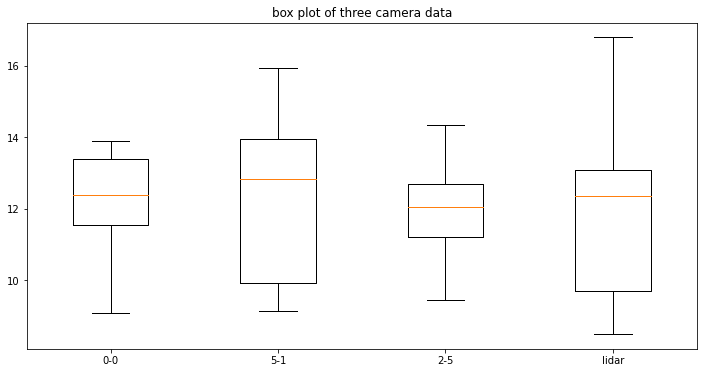

In [102]:
fig, ax = plt.subplots(figsize=(12,6))
res = ax.boxplot(all_cameraTTCs + [lidarTTCs])
ax.set_xticklabels(cam_names + ['lidar']);
ax.set_title("box plot of three camera data")